Mineral Ore Analysis 

In [43]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [19]:
data = gpd.read_file("Mineral-ores.csv")
data.crs = 'epsg:4326'
data.head()

,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,...,prod_size,dev_stat,ore,gangue,work_type,names,ore_ctrl,hrock_type,arock_type,geometry
0,Lookout Prospect,55.05612,-132.14344,NA,United States,Alaska,,M,Copper,"Gold, Silver",...,N,Occurrence,"Chalcopyrite, Covellite, Pyrite","Quartz, Sericite",,"Conundrum, Mammoth, Wakefield Minerals Co.",,Schist,,None
1,Lucky Find Prospect,55.52751,-132.68514,NA,United States,Alaska,,M,Copper,Gold,...,N,Occurrence,"Chalcopyrite, Pyrite","Calcite, Quartz, Siderite",Underground,,Vein Follows Contact,Diabase,,None
2,Mccullough Prospect,55.97751,-132.99906,NA,United States,Alaska,,M,Copper,,...,N,Occurrence,"Chalcopyrite, Pyrite, Sphalerite",Quartz,,"Claims: Horseshoe, Copper, Lake Bay",,Siltstone,,None
3,Lucky Jim Claim,55.52195,-132.68653,NA,United States,Alaska,,M,Gold,,...,N,Occurrence,"Galena, Malachite, Pyrite",,,,,Granite,Granite,None
4,Matilda Occurrence,55.14556,-132.05233,NA,United States,Alaska,,M,Gold,,...,N,Occurrence,Pyrite,,,,,Mica Schist,,None


In [20]:
type(data)

geopandas.geodataframe.GeoDataFrame

In [21]:
data = data.dropna(subset=['commod1'])
data.isnull().sum()

site_name          0
latitude           0
longitude          0
region             0
country            0
state              0
county             0
com_type           0
commod1            0
commod2            0
commod3            0
oper_type          0
dep_type           0
prod_size          0
dev_stat           0
ore                0
gangue             0
work_type          0
names              0
ore_ctrl           0
hrock_type         0
arock_type         0
geometry      304632
dtype: int64

In [22]:
new_data = data.loc[:, ["ore", "gangue", "geometry"]].copy()
new_data.head()

,ore,gangue,geometry
0,"Chalcopyrite, Covellite, Pyrite","Quartz, Sericite",None
1,"Chalcopyrite, Pyrite","Calcite, Quartz, Siderite",None
2,"Chalcopyrite, Pyrite, Sphalerite",Quartz,None
3,"Galena, Malachite, Pyrite",,None
4,Pyrite,,None


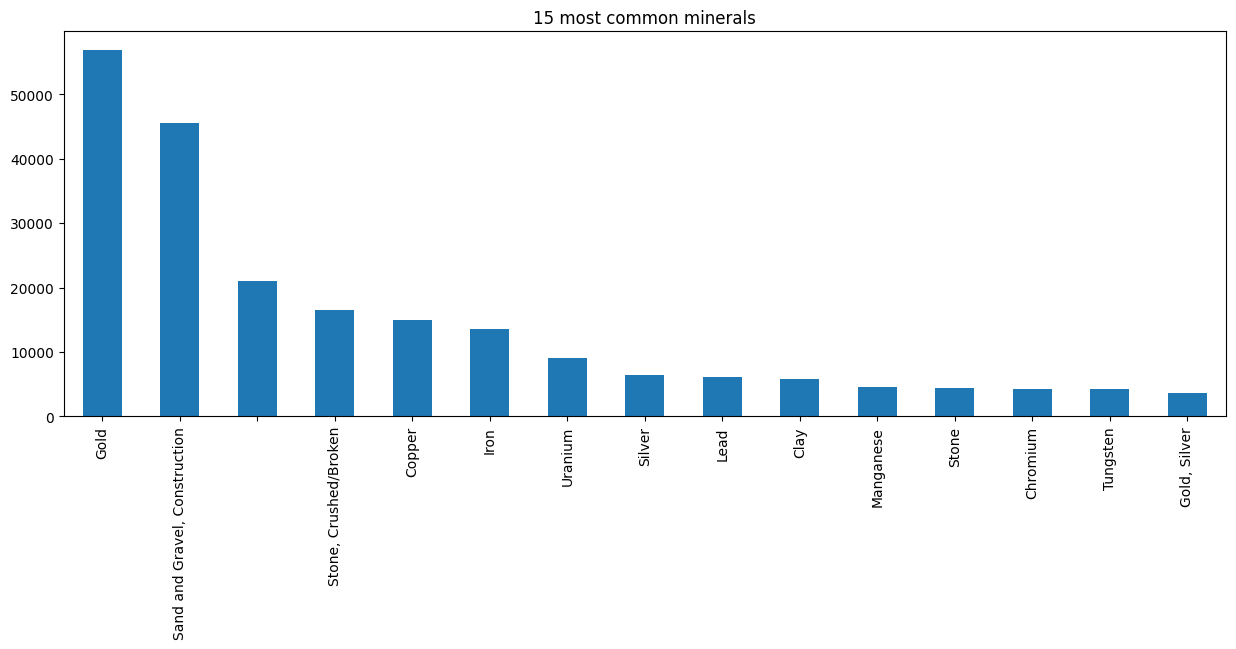

In [19]:
#`15 most common minerals
commonMinerals = data.commod1.value_counts().head(15)
commonMinerals.plot(kind='bar',figsize=(15,5), title='15 most common minerals');

In [23]:
#Setting points of geometry from latitude and longitude
data['lat'] = pd.to_numeric(data['latitude'])
data['lon'] = pd.to_numeric(data['longitude'])

data['geometry'] = gpd.points_from_xy(data.lon, data.lat)
data.head()

,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,...,ore,gangue,work_type,names,ore_ctrl,hrock_type,arock_type,geometry,lat,lon
0,Lookout Prospect,55.05612,-132.14344,NA,United States,Alaska,,M,Copper,"Gold, Silver",...,"Chalcopyrite, Covellite, Pyrite","Quartz, Sericite",,"Conundrum, Mammoth, Wakefield Minerals Co.",,Schist,,POINT (-132.14344 55.05612),55.05612,-132.14344
1,Lucky Find Prospect,55.52751,-132.68514,NA,United States,Alaska,,M,Copper,Gold,...,"Chalcopyrite, Pyrite","Calcite, Quartz, Siderite",Underground,,Vein Follows Contact,Diabase,,POINT (-132.68514 55.52751),55.52751,-132.68514
2,Mccullough Prospect,55.97751,-132.99906,NA,United States,Alaska,,M,Copper,,...,"Chalcopyrite, Pyrite, Sphalerite",Quartz,,"Claims: Horseshoe, Copper, Lake Bay",,Siltstone,,POINT (-132.99906 55.97751),55.97751,-132.99906
3,Lucky Jim Claim,55.52195,-132.68653,NA,United States,Alaska,,M,Gold,,...,"Galena, Malachite, Pyrite",,,,,Granite,Granite,POINT (-132.68653 55.52195),55.52195,-132.68653
4,Matilda Occurrence,55.14556,-132.05233,NA,United States,Alaska,,M,Gold,,...,Pyrite,,,,,Mica Schist,,POINT (-132.05233 55.14556),55.14556,-132.05233


In [24]:
new_data = data.loc[:, ["ore", "gangue", "geometry"]].copy()
new_data.head()

,ore,gangue,geometry
0,"Chalcopyrite, Covellite, Pyrite","Quartz, Sericite",POINT (-132.14344 55.05612)
1,"Chalcopyrite, Pyrite","Calcite, Quartz, Siderite",POINT (-132.68514 55.52751)
2,"Chalcopyrite, Pyrite, Sphalerite",Quartz,POINT (-132.99906 55.97751)
3,"Galena, Malachite, Pyrite",,POINT (-132.68653 55.52195)
4,Pyrite,,POINT (-132.05233 55.14556)


In [17]:
#Check for missing data
data.country.isna().sum()

0

<AxesSubplot:>

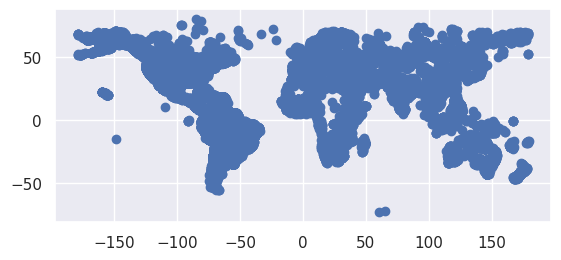

In [25]:
data.plot()

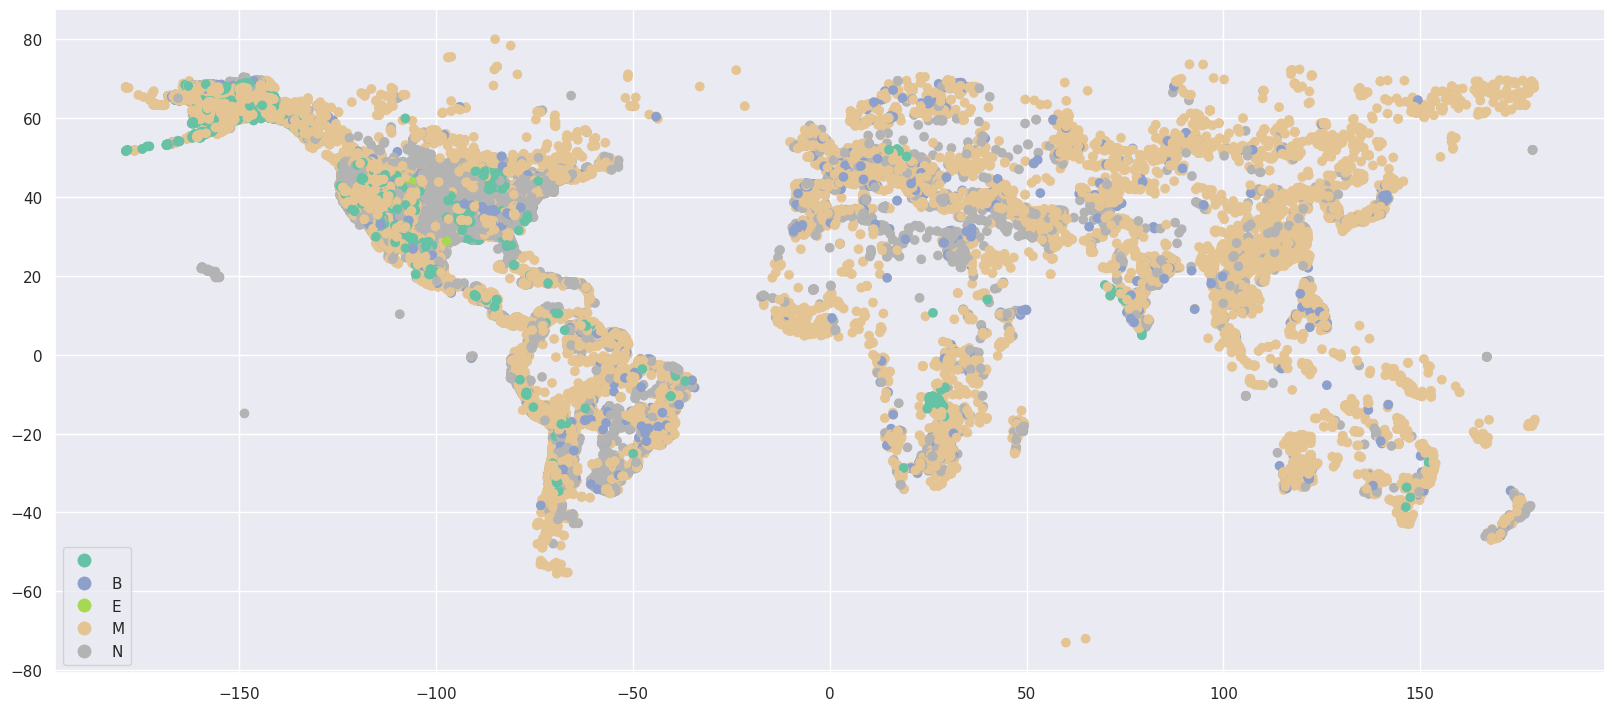

In [26]:
#Static map colored by com_type
data.plot(figsize=(20,10), column='com_type', cmap='Set2', legend=True);

<AxesSubplot:xlabel='region', ylabel='count'>

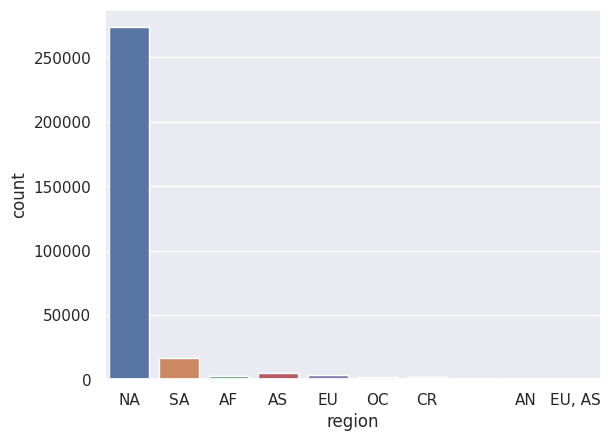

In [35]:
# Regions with the most mineral plots
sns.countplot(x = data['region'])

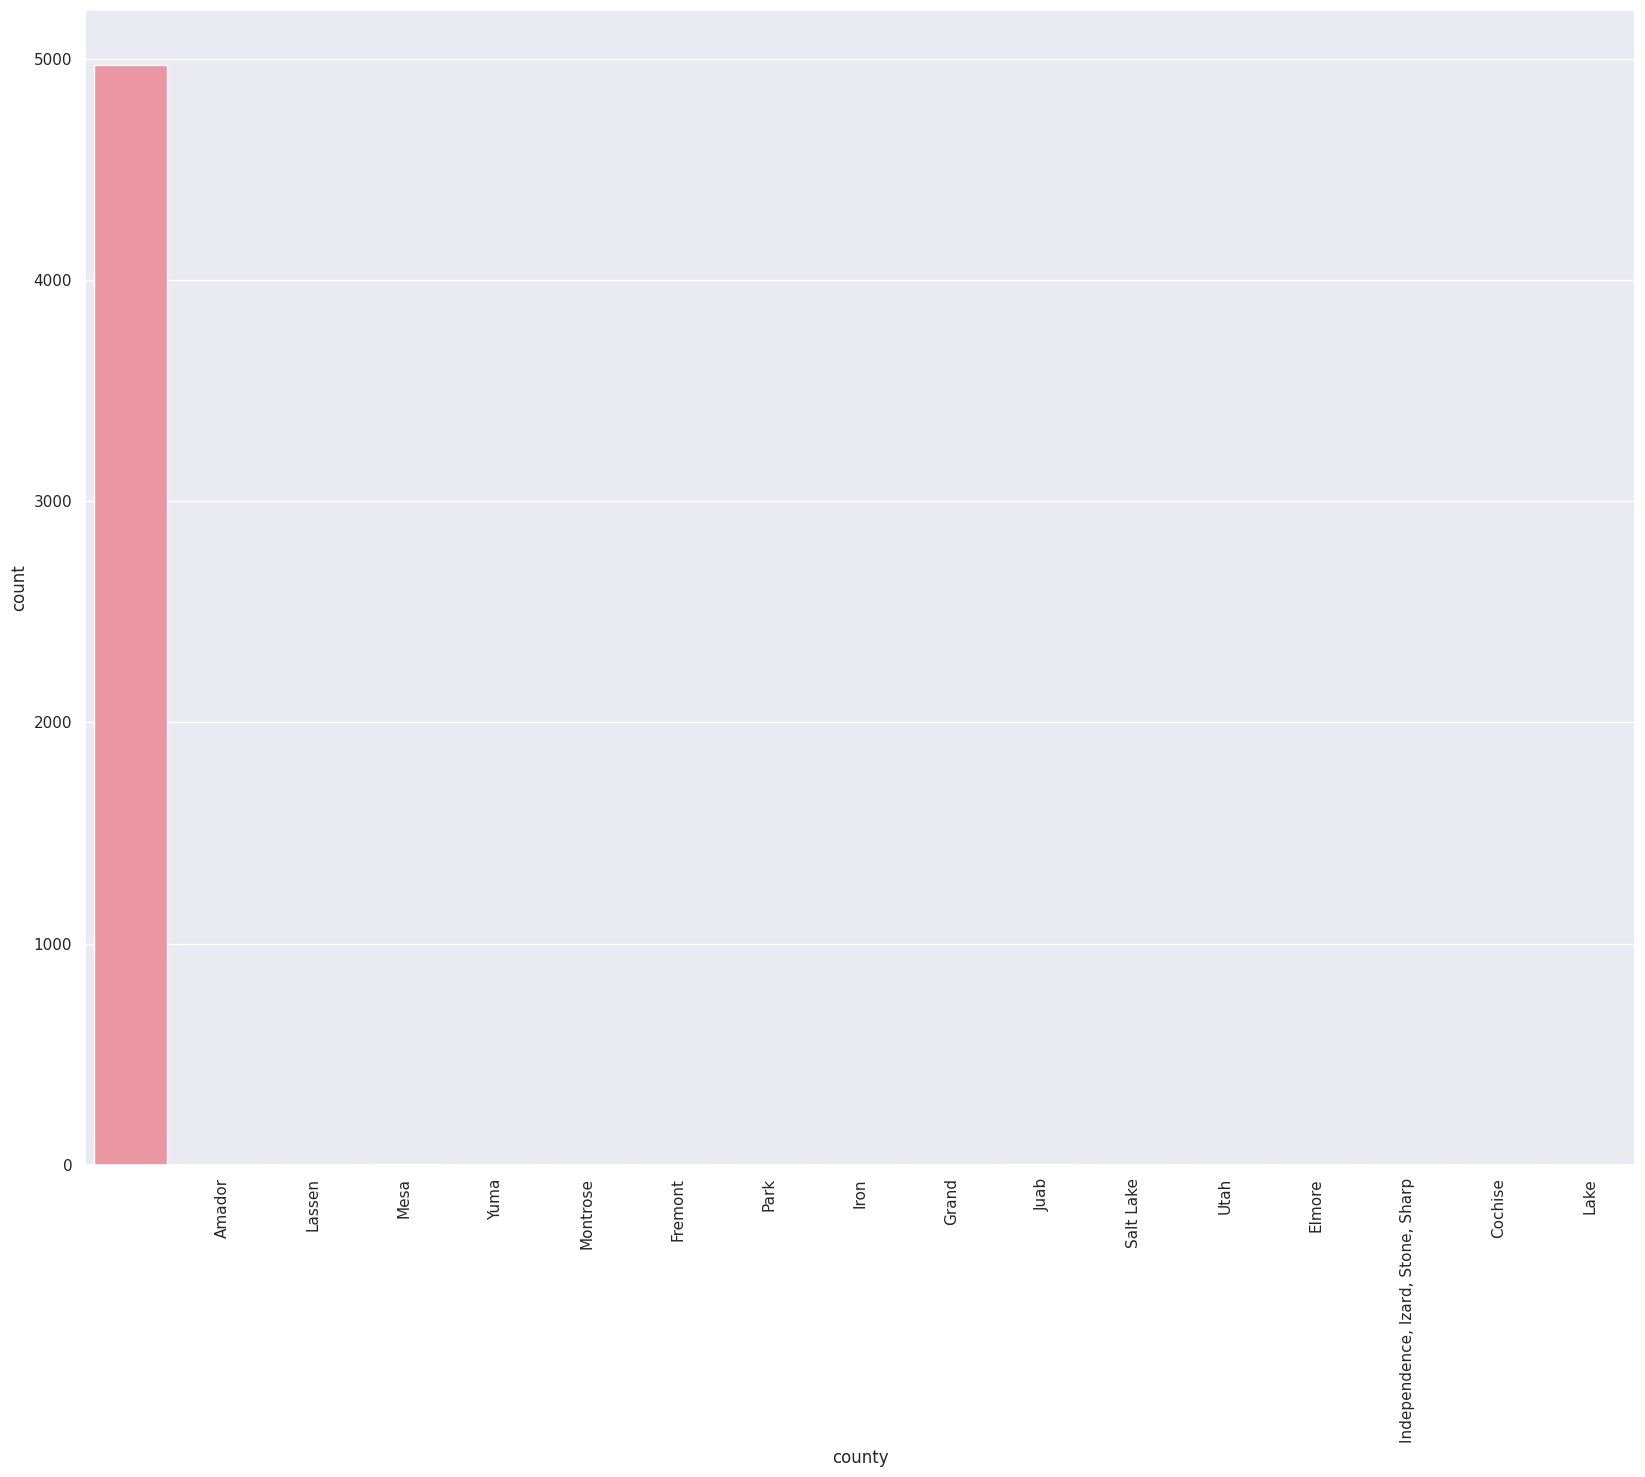

In [24]:
#Countries with the most mineral types
plt.figure(figsize=(20,15))
sns.countplot(x=data['county'].head(5000))
plt.xticks(rotation=90)
plt.show()

In [28]:
import plotly.express as px

In [36]:
data_india = data[data['country'] == "India"]
data_india

,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,...,ore,gangue,work_type,names,ore_ctrl,hrock_type,arock_type,geometry,lat,lon
3891,Adilabad,22.88286,79.61656,AS,India,,,M,Manganese,,...,"Birnessite, Braunite, Pyrolusite, Todorokite",Quartz,,,,"Shale,Limestone,Chert",,POINT (79.61656 22.88286),22.88286,79.61656
3892,Amatola,21.76615,80.11701,AS,India,Madhya Pradesh,,M,Manganese,,...,,,,,,,,POINT (80.11701 21.76615),21.76615,80.11701
3893,Banjari,21.8828,80.31701,AS,India,Madhya Pradesh,,M,Manganese,,...,,,,,,,,POINT (80.31701 21.88280),21.88280,80.31701
3894,Banjartola,21.95779,80.27534,AS,India,Madhya Pradesh,,M,Manganese,,...,"Braunite, Pyrolusite",,,Jagantola,,"Quartzite,Schist",,POINT (80.27534 21.95779),21.95779,80.27534
3895,Barbaspur,21.79947,80.10867,AS,India,Madhya Pradesh,,M,Manganese,,...,,,,,,,,POINT (80.10867 21.79947),21.79947,80.10867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303611,Chavara Deposit,9.16738,76.50041,AS,India,Kerala,,B,"REE, Kyanite, Thorium, Zirconium, Titanium",,...,,,,Quilon,,,,POINT (76.50041 9.16738),9.16738,76.50041
303612,Manavalakurichi Deposit,8.20077,77.33369,AS,India,,,B,"Thorium, Titanium, Zirconium, Garnet, REE",,...,,,,M.K.,,,,POINT (77.33369 8.20077),8.20077,77.33369
303623,Maharashtra State,21.13283,79.68365,AS,India,Maharashtra,,M,Vanadium,,...,,,,,,,,POINT (79.68365 21.13283),21.13283,79.68365
303879,Puga Valley,33.91525,78.41713,AS,India,Jammu and Kashmir,,N,"Boron-Borates, Sulfur","Sodium Sulfate, Gypsum-Anhydrite, Halite, Soda...",...,,,,Pugga,VOLCANIC ORIGIN OF BORATES FROM DEEP FRACTURES...,,,POINT (78.41713 33.91525),33.91525,78.41713


In [32]:
data_india = data_india.dropna(subset=['state'])
data_india.head()

,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,...,ore,gangue,work_type,names,ore_ctrl,hrock_type,arock_type,geometry,lat,lon
3891,Adilabad,22.88286,79.61656,AS,India,,,M,Manganese,,...,"Birnessite, Braunite, Pyrolusite, Todorokite",Quartz,,,,"Shale,Limestone,Chert",,POINT (79.61656 22.88286),22.88286,79.61656
3892,Amatola,21.76615,80.11701,AS,India,Madhya Pradesh,,M,Manganese,,...,,,,,,,,POINT (80.11701 21.76615),21.76615,80.11701
3893,Banjari,21.8828,80.31701,AS,India,Madhya Pradesh,,M,Manganese,,...,,,,,,,,POINT (80.31701 21.88280),21.88280,80.31701
3894,Banjartola,21.95779,80.27534,AS,India,Madhya Pradesh,,M,Manganese,,...,"Braunite, Pyrolusite",,,Jagantola,,"Quartzite,Schist",,POINT (80.27534 21.95779),21.95779,80.27534
3895,Barbaspur,21.79947,80.10867,AS,India,Madhya Pradesh,,M,Manganese,,...,,,,,,,,POINT (80.10867 21.79947),21.79947,80.10867


In [33]:
data_india_gold = data_india[(data_india['commod1']=='Gold')|(data_india['commod1']=='Gold and other')]
data_india_gold = data_india_gold.loc[:,["state", "region","lat", "lon", "geometry"]].copy()
data_india_gold.head()

,state,region,lat,lon,geometry
20898,Karnataka,AS,14.68706,76.18530,POINT (76.18530 14.68706)
20899,Karnataka,AS,14.68706,76.18530,POINT (76.18530 14.68706)
37852,Assam,AS,27.54898,95.99992,POINT (95.99992 27.54898)
37854,,AS,12.31703,76.65041,POINT (76.65041 12.31703)
272752,Karnataka,AS,13.16698,78.16707,POINT (78.16707 13.16698)


In [14]:
map_df = gpd.read_file("india-polygon.csv") 
map_df.head()

,id,st_nm,WKT,geometry
0,,Andaman and Nicobar Islands,MULTIPOLYGON (((93.84830850762702 7.2402776145...,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,,Arunachal Pradesh,POLYGON ((95.23643457993093 26.681049602925928...,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,,Assam,POLYGON ((95.19593819532562 27.036122602604937...,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,,Bihar,"POLYGON ((88.1135704876876 26.54028101725437, ...","POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,,Chandigarh,"POLYGON ((76.84207677254575 30.76123756373442,...","POLYGON ((76.84208 30.76124, 76.83758 30.72552..."


<AxesSubplot:>

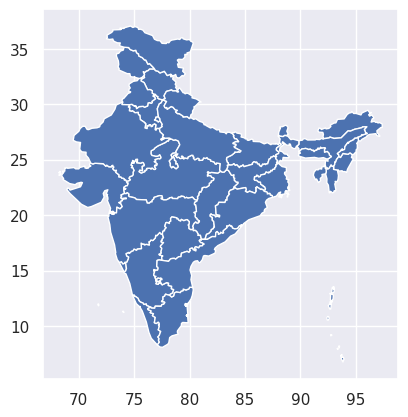

In [39]:
map_df.plot()

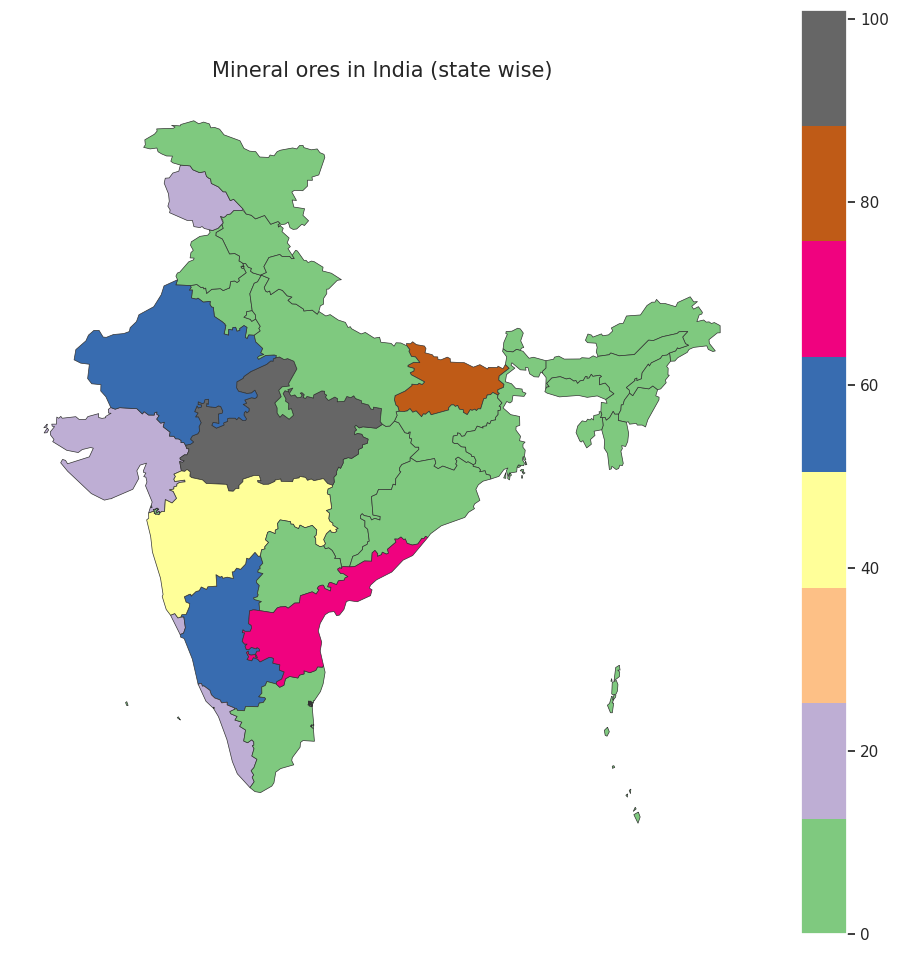

In [42]:
indian_ores=data_india["state"].value_counts().to_frame()
indian_ores=indian_ores.reset_index().rename(columns={"index":"state","state":"mineral_ore_present"})

merged = map_df.set_index('st_nm').join(indian_ores.set_index('state')).fillna(0)
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Mineral ores in India (state wise)',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='mineral_ore_present', cmap='Accent', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)